In [5]:
import numpy as np

def distance(p1, p2):
    """Find the distance between points p1 and 2p"""
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1, p2)

4.242640687119285

In [21]:
import random

def majority_vote(votes):
    """
    Return de the most commom element in votes
    """
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
                        
    return random.choice(winners)

votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)

winner

3

In [24]:
import scipy.stats as ss

def majority_vote_short(votes):
    """
    Return de the most commom element in votes
    """
    mode, count = ss.mstats.mode(votes)
    return mode

majority_vote_short(votes)

array([2.])

(0.5, 3.5, 0.5, 3.5)

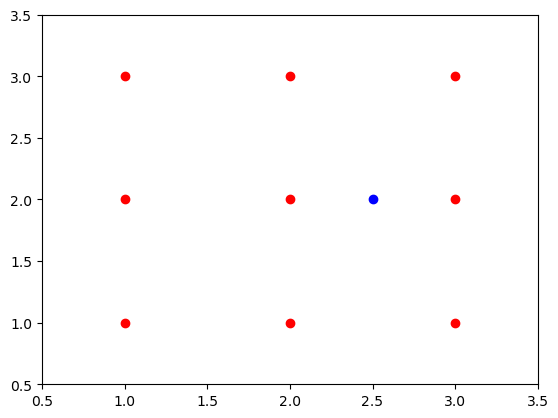

In [46]:
import matplotlib.pyplot as plt

def find_nearest_neighbors(p, points, k=5):
    """
    Find the k nearest neighbors (points) of point p and return their indices.
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[0:k]

points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])

plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0], p[1], "bo")
plt.axis([0.5, 3.5, 0.5, 3.5])

In [51]:
ind = find_nearest_neighbors(p, points, 4)
points[ind]

array([[2, 2],
       [3, 2],
       [2, 1],
       [2, 3]])

In [59]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

outcomes = np.array([0,0,0,0,1,1,1,1,1])
knn_predict(np.array([1.0, 2.7]), points, outcomes, 2)

0

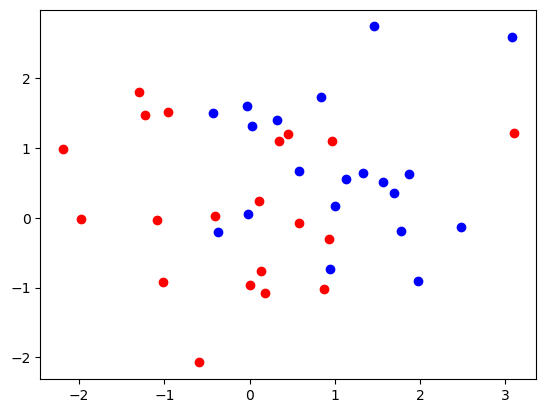

In [75]:
def generate_synth_data(n=50):
    """
    Creat two sets of points from bivariate normal distributions.
    """
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n=20
(points, outcomes) = generate_synth_data(n)

plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")

In [78]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """
    Classify each point on the prediction grid.
    """
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    
    return (xx, yy, prediction_grid)

In [80]:
(predictors, outcomes) = generate_synth_data()
outcomes.shape

(100,)

In [1]:
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data = data.reset_index(drop=True)
data

0    4
1    1
2    2
3    3
dtype: int64

In [15]:
birddata = pd.read_csv("bird_tracking.csv", index_col=0)
ix = birddata.bird_name == "Sanne"
birddata.date_time[ix]

40916    2013-08-15 00:01:08+00
40917    2013-08-15 00:31:00+00
40918    2013-08-15 01:01:19+00
40919    2013-08-15 01:31:38+00
40920    2013-08-15 02:01:24+00
                  ...          
61915    2014-04-30 22:00:08+00
61916    2014-04-30 22:29:57+00
61917    2014-04-30 22:59:52+00
61918    2014-04-30 23:29:43+00
61919    2014-04-30 23:59:34+00
Name: date_time, Length: 21004, dtype: object

In [8]:
bird_names = pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <BarContainer object of 10 artists>)

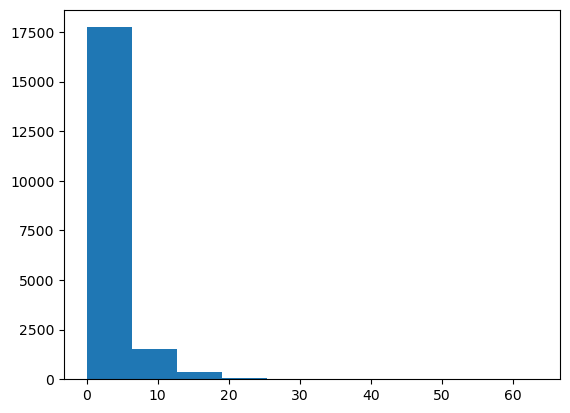

In [12]:
import numpy as np
import matplotlib.pyplot as plt

ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind])

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

